# Brain Tumor Detection and classification Project 

In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ----------------------------------- ---- 51.2

In [15]:
!pip install imutils
 

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=dc3bd4854f9454c3dae63be1750d9fd11a1c127be9c3e1358ca858d568676f71
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\31\d0\2c\87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils


In [12]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 1.6 MB/s eta 0:00:25
   ---------------------------------------- 0.5/38.6 MB 4.2 MB/s eta 0:00:10
    --------------------------------------- 0.9/38.6 MB 5.9 MB/s eta 0:00:07
   - -------------------------------------- 1.4/38.6 MB 7.6 MB/s eta 0:00:05
   - -------------------------------------- 1.9/38.6 MB 8.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.4/38.6 MB 8.4 MB/s eta 0:00:05
   --- ------------------------------------ 2.9/38.6 MB 9.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/38.6 MB 9.3 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/38.6 MB 9.3 MB/s eta 0:00:04
   ---- --------

In [48]:
# Import necessary modules

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
from os import listdir
import cv2



In [49]:
# Load the images directories
path = "F:\\Shruti\\Data Analysis Course\\Topmentor\\healthare projects\\brain_tumor_dataset"
print(os.listdir(path))

image_paths = list(paths.list_images(path))
print(len(image_paths))

['no', 'yes']
253


In [50]:
# 
images = []
labels = []

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    images.append(image)
    labels.append(label)

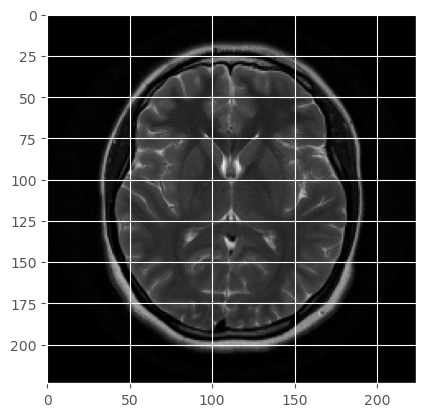

In [51]:
# Plot an image
def plot_image(image):
    plt.imshow(image)

plot_image(images[0])

In [43]:
# Convert into numpy arrays
images = np.array(images) / 255.0
labels = np.array(labels)

In [52]:
# Perform One-hot encoding
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

print(labels[0])

[1. 0.]


In [53]:
#Split the dataset
(train_X, test_X, train_Y, test_Y) = train_test_split(images, labels, test_size= 0.10, random_state= 42, stratify= labels)

In [29]:
#Build a CNN model 
# Build the Image Data Generator
train_generator = ImageDataGenerator(fill_mode= 'nearest', rotation_range= 15)

In [30]:
# Build the model
base_model = VGG16(weights= 'imagenet', input_tensor= Input(shape = (224, 224, 3)), include_top= False)
base_input = base_model.input
base_output = base_model.output
base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
base_output = Flatten(name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation="softmax")(base_output)



58889256/58889256 [==============================] - 7s 0us/step


In [31]:
# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

In [32]:
# Compile the model
model = Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [33]:
# architecture summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [34]:
#traing the model
batch_size = 5
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 8

In [35]:
# Fit the model
history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size),
                              steps_per_epoch= train_steps,
                              validation_data = (test_X, test_Y),
                              validation_steps= validation_steps,
                              epochs= epochs)

C:\Users\ACER\AppData\Local\Temp\ipykernel_4296\3802621659.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size),


Epoch 1/8


45/45 [==============================] - 59s 1s/step - loss: 0.7293 - accuracy: 0.5676 - val_loss: 0.6180 - val_accuracy: 0.6154
Epoch 2/8
45/45 [==============================] - 52s 1s/step - loss: 0.6525 - accuracy: 0.6306 - val_loss: 0.5473 - val_accuracy: 0.6538
Epoch 3/8
45/45 [==============================] - 51s 1s/step - loss: 0.6199 - accuracy: 0.6441 - val_loss: 0.4974 - val_accuracy: 0.8846
Epoch 4/8
45/45 [==============================] - 50s 1s/step - loss: 0.6003 - accuracy: 0.6892 - val_loss: 0.4539 - val_accuracy: 0.9231
Epoch 5/8
45/45 [==============================] - 51s 1s/step - loss: 0.5673 - accuracy: 0.7467 - val_loss: 0.4087 - val_accuracy: 0.9615
Epoch 6/8
45/45 [==============================] - 51s 1s/step - loss: 0.5250 - accuracy: 0.7658 - val_loss: 0.3911 - val_accuracy: 0.9615
Epoch 7/8
45/45 [==============================] - 51s 1s/step - loss: 0.5291 - accuracy: 0.7477 - val_loss: 0.3792 - val_accuracy: 0.9231
Epoch 8/8
45/45 [========

In [36]:
# Evaluate the model
predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

6/6 [==============================] - 6s 861ms/step


In [37]:
# Print Classification report and Confusion matrix
print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

              precision    recall  f1-score   support

          no       0.91      1.00      0.95        10
         yes       1.00      0.94      0.97        16

    accuracy                           0.96        26
   macro avg       0.95      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26

[[10  0]
 [ 1 15]]


In [38]:
# Final accuracy of our model
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.9615


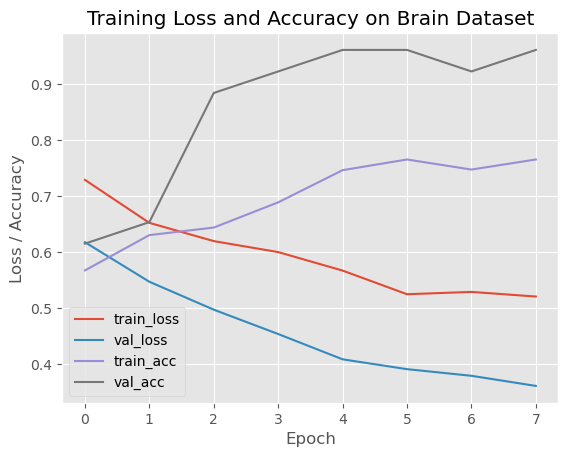

In [39]:
# Plot the losses and accuracies
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")